# Reading Test Scores

The Programme for International Student Assessment (PISA) is a test given every three years to 15-year-old students from around the world to evaluate their performance in mathematics, reading, and science. This test provides a quantitative way to compare the performance of students from different parts of the world. In this homework assignment, we will predict the reading scores of students from the United States of America on the 2009 PISA exam.

The datasets `pisa2009train.csv` and `pisa2009test.csv` contain information about the demographics and schools for American students taking the exam, derived from [2009 PISA Public-Use Data Files](https://nces.ed.gov/pubsearch/pubsinfo.asp?pubid=2011038) distributed by the United States National Center for Education Statistics (NCES). While the datasets are not supposed to contain identifying information about students taking the test, by using the data you are bound by the [NCES data use agreement](https://prod-edxapp.edx-cdn.org/assets/courseware/v1/8522b75c7463c923fb96ae274fdf8213/asset-v1:MITx+15.071x+2T2017+type@asset+block/NCES_Data_Use_Agreement.txt), which prohibits any attempt to determine the identity of any student in the datasets.

### Data Description

Each row in the datasets `pisa2009train.csv` and `pisa2009test.csv` represents one student taking the exam. The datasets have the following variables:

**grade**: The grade in school of the student (most 15-year-olds in America are in 10th grade)

**male**: Whether the student is male (1/0)

**raceeth**: The race/ethnicity composite of the student

**preschool**: Whether the student attended preschool (1/0)

**expectBachelors**: Whether the student expects to obtain a bachelor's degree (1/0)

**motherHS**: Whether the student's mother completed high school (1/0)

**motherBachelors**: Whether the student's mother obtained a bachelor's degree (1/0)

**motherWork**: Whether the student's mother has part-time or full-time work (1/0)

**fatherHS**: Whether the student's father completed high school (1/0)

**fatherBachelors**: Whether the student's father obtained a bachelor's degree (1/0)

**fatherWork**: Whether the student's father has part-time or full-time work (1/0)

**selfBornUS**: Whether the student was born in the United States of America (1/0)

**motherBornUS**: Whether the student's mother was born in the United States of America (1/0)

**fatherBornUS**: Whether the student's father was born in the United States of America (1/0)

**englishAtHome**: Whether the student speaks English at home (1/0)

**computerForSchoolwork**: Whether the student has access to a computer for schoolwork (1/0)

**read30MinsADay**: Whether the student reads for pleasure for 30 minutes/day (1/0)

**minutesPerWeekEnglish**: The number of minutes per week the student spend in English class

**studentsInEnglish**: The number of students in this student's English class at school

**schoolHasLibrary**: Whether this student's school has a library (1/0)

**publicSchool**: Whether this student attends a public school (1/0)

**urban**: Whether this student's school is in an urban area (1/0)

**schoolSize**: The number of students in this student's school

**readingScore**: The student's reading score, on a 1000-point scale

### Data Understanding

In [1]:
import pandas as pd
pd.__version__

'0.24.2'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Load data

In [3]:
pisaTrain = pd.read_csv("../Data/pisa2009train.csv")
pisaTest = pd.read_csv("../Data/pisa2009test.csv")

In [4]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [5]:
pisaTest.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [6]:
pisaTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
grade                    3663 non-null int64
male                     3663 non-null int64
raceeth                  3628 non-null object
preschool                3607 non-null float64
expectBachelors          3601 non-null float64
motherHS                 3566 non-null float64
motherBachelors          3266 non-null float64
motherWork               3570 non-null float64
fatherHS                 3418 non-null float64
fatherBachelors          3094 non-null float64
fatherWork               3430 non-null float64
selfBornUS               3594 non-null float64
motherBornUS             3592 non-null float64
fatherBornUS             3550 non-null float64
englishAtHome            3592 non-null float64
computerForSchoolwork    3598 non-null float64
read30MinsADay           3629 non-null float64
minutesPerWeekEnglish    3477 non-null float64
studentsInEnglish        3414 non-null float64
schoo

In [7]:
pisaTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
grade                    1570 non-null int64
male                     1570 non-null int64
raceeth                  1557 non-null object
preschool                1549 non-null float64
expectBachelors          1547 non-null float64
motherHS                 1525 non-null float64
motherBachelors          1382 non-null float64
motherWork               1534 non-null float64
fatherHS                 1445 non-null float64
fatherBachelors          1282 non-null float64
fatherWork               1457 non-null float64
selfBornUS               1546 non-null float64
motherBornUS             1547 non-null float64
fatherBornUS             1512 non-null float64
englishAtHome            1543 non-null float64
computerForSchoolwork    1540 non-null float64
read30MinsADay           1549 non-null float64
minutesPerWeekEnglish    1467 non-null float64
studentsInEnglish        1456 non-null float64
schoo

Summary of missing values

In [8]:
pisaTrain.isna().sum(axis = 0)

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [9]:
pisaTest.isna().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

### Summarizing the data set

 What is the average reading test score of males?

In [10]:
male = pisaTrain["male"] == 1
pisaTrain[male]["readingScore"].mean()

483.53247863247805

of females?

In [11]:
female = pisaTrain["male"] == 0
pisaTrain[female]["readingScore"].mean()

512.94063093244

Removing missing values

In [12]:
pisaTrain = pisaTrain.dropna()
pisaTest = pisaTest.dropna()

In [13]:
pisaTrain.shape

(2414, 24)

Categorical variable `raceeth` has several levels:

In [14]:
pisaTrain["raceeth"].value_counts()

White                                     1470
Hispanic                                   500
Black                                      228
Asian                                       95
More than one race                          81
American Indian/Alaska Native               20
Native Hawaiian/Other Pacific Islander      20
Name: raceeth, dtype: int64

To procced with regression model we need to create several binary variables that reflect every level of categorical variable `raceeth`

In [15]:
for level in pisaTrain["raceeth"].unique():
    new_col = "is{}".format(level)
    new_col = new_col.replace(" ", '')
    new_col = new_col.replace("/", "_")
    pisaTrain[new_col] = [1 if x == level else 0 for x in pisaTrain["raceeth"]]

for level in pisaTest["raceeth"].unique():
    new_col = "is{}".format(level)
    new_col = new_col.replace(" ", '')
    new_col = new_col.replace("/", "_")
    pisaTest[new_col] = [1 if x == level else 0 for x in pisaTest["raceeth"]]


In [16]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,isWhite,isBlack,isHispanic,isMorethanonerace,isAmericanIndian_AlaskaNative,isAsian,isNativeHawaiian_OtherPacificIslander
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01,1,0,0,0,0,0,0
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11,0,1,0,0,0,0,0
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89,0,0,1,0,0,0,0
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36,1,0,0,0,0,0,0
9,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90,0,0,0,1,0,0,0


### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# define predictor variables
features = ['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'isWhite',
       'isBlack', 'isHispanic', 'isMorethanonerace',
       'isAmericanIndian_AlaskaNative', 'isAsian',
       'isNativeHawaiian_OtherPacificIslander']

In [19]:
xTrain = pisaTrain[features]
yTrain = pisaTrain["readingScore"]

In [20]:
# fit a linear model to training data
modelLR = LinearRegression().fit(xTrain, yTrain)

In [21]:
# evaluate R^2 on the training data set
modelLR.score(xTrain, yTrain)

0.3251433559213568

In [22]:
# coefficients
# convert corfficients to series

print("Intersept: {}".format(modelLR.intercept_))

coef = pd.Series(modelLR.coef_ , index = features)
coef.index.name = 'Regression Coefficients:'
coef

Intersept: 115.28067518150885


Regression Coefficients:
grade                                    29.542707
male                                    -14.521653
preschool                                -4.463670
expectBachelors                          55.267080
motherHS                                  6.058774
motherBachelors                          12.638068
motherWork                               -2.809101
fatherHS                                  4.018214
fatherBachelors                          16.929755
fatherWork                                5.842798
selfBornUS                               -3.806278
motherBornUS                             -8.798153
fatherBornUS                              4.306994
englishAtHome                             8.035685
computerForSchoolwork                    22.500232
read30MinsADay                           34.871924
minutesPerWeekEnglish                     0.012788
studentsInEnglish                        -0.286631
schoolHasLibrary                         12.215085
public

Computing the root-mean squared error of the model

In [23]:
from math import sqrt

# predict readingScore using our model on training data set
yPredicted = modelLR.predict(xTrain)

MSE = ((yTrain - yPredicted)**2).mean()
MSE = sqrt(MSE)
print("MSE = {}".format(MSE))

MSE = 73.3655514329845


#### Identifying variables lacking statistical significance

To evalueate the significance we need to use anothe Python library `statsmodels`. In a linear regression model, a coefficient is considered significant if the coefficient estimape is significantly different from zero according to the data used to build the model. If a coefficiant is not significantly different than zero, then we should probably remove the variable from the model, since it is not helping predict the dependent variable.

In [24]:
# statsmodel using formula
import statsmodels.formula.api as smf

x = "+".join(features)
modelLR_stat = smf.ols('readingScore ~ {}'.format(x), data = pisaTrain).fit()
print(modelLR_stat.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     41.04
Date:                Sun, 14 Jul 2019   Prob (F-statistic):          1.72e-180
Time:                        11:37:44   Log-Likelihood:                -13795.
No. Observations:                2414   AIC:                         2.765e+04
Df Residuals:                    2385   BIC:                         2.781e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Insignificant variables have P more than 0.05.

#### Predicting on unseen data

Use the model to predict the reading scores of students in pisaTest. Call this vector of predictions "predTest". Do not change the variables in the model (for example, do not remove variables that we found were not significant in the previous part of this problem). Use the summary function to describe the test set predictions.

In [25]:
# prepare the test data set 
xTest = pisaTest[features]
yTest = pisaTest["readingScore"]

# fit the model on test data set
yPredicted = modelLR.predict(xTest)

What is the range between the maximum and minimum predicted reading score on the test set?

In [26]:
yPredicted.max() - yPredicted.min()

284.4683117951397

#### Test set SSE and RMSE

What is the sum of squared errors (SSE) of readingScore on the testing set? What is the root-mean squared error (RMSE) of readingScore on the testing set?

In [27]:
from math import sqrt
SSE = ((yPredicted - yTest)**2).sum()
print("SSE = {}".format(SSE))
RMSE = sqrt(SSE/len(yTest))
print("RMSE = {}".format(RMSE))

SSE = 5762082.371144427
RMSE = 76.29079383109216


#### Baseline prediction and test-set SSE

What is the predicted test score used in the baseline model? Remember to compute this value using the training set and not the test set.

In [28]:
baseline = yTrain.mean()
baseline

517.9628873239429

#### Model Evaluation

In [39]:
def model_evaluation(model, data, response):
    import seaborn as sns
    
    predicted = model.predict(data)

    RSS = sum((response-predicted)**2)
    TSS = sum((yTrain.mean()-response)**2)

    R2 = 1.0 - RSS/TSS
    print("Model performance R^2 = {}".format(R2))
    
    print("Baseline model prediction {}".format(yTrain.mean()))
    print("RSS = {}".format(RSS))
    print("TSS = {}".format(TSS))

    width = 12
    height = 5

    fig = plt.figure(figsize=(width, height))
    ax1 = fig.add_subplot(121)
    sns.residplot(response, predicted, color = "magenta", scatter_kws = {"alpha":0.5, "edgecolor": "black"})
    plt.ylabel("Residuals")

    ax2 = fig.add_subplot(122)
    sns.distplot(predicted, hist=False, color="b", label="Fitted Values" )
    sns.distplot(response, hist=False, color="r", label="Actual Value")
    plt.title("Distribution Plot")

    plt.show()

Training
Model performance R^2 = 0.3251433559213579
Baseline model prediction 517.9628873239429
RSS = 12993364.986877073
TSS = 19253518.65597538


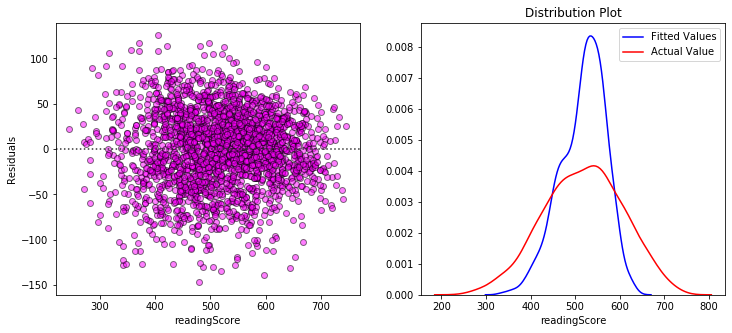

In [40]:
print("Training")
model_evaluation(modelLR, xTrain, yTrain)

What is the test-set R-squared value of readingScore?

Test
Model performance R^2 = 0.26149437543769694
Baseline model prediction 517.9628873239429
RSS = 5762082.37114444
TSS = 7802354.077613839


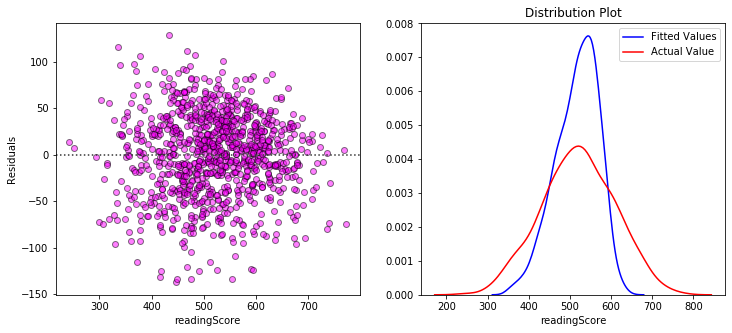

In [41]:
print("Test")
model_evaluation(modelLR, xTest, yTest)

Training
Model performance R^2 = 0.26149437543770526
Baseline model prediction 517.9628873239429
RSS = 5762082.371144375
TSS = 7802354.077613839


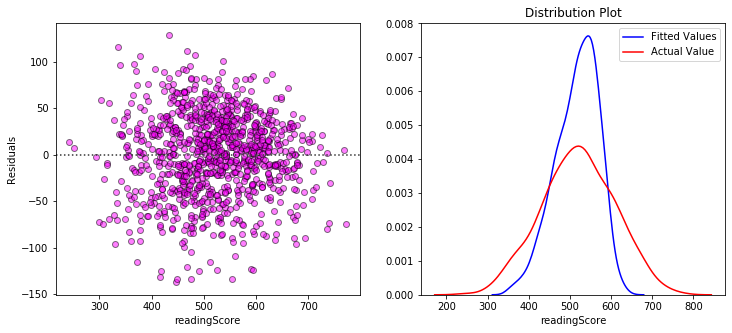

In [46]:
print("Training")
model_evaluation(modelLR_stat, xTest, yTest)